In [1524]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1525]:
data= pd.read_csv('kc_house_data.csv') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [1526]:
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [1527]:
sum(data.isnull().sum())

0

In [1528]:
data.head().shape

(5, 21)

In [1529]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Imputing

In [1530]:
numerical_columns=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']

In [1531]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data[numerical_columns]=imputer.fit_transform(data[numerical_columns])

In [1532]:
data['price']=data['price'].astype(float)

In [1533]:
data.drop(columns='id',inplace=True)

In [1534]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [1535]:
data.drop(columns='sqft_basement',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  float64
 5   sqft_lot       21613 non-null  float64
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  float64
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  float64
 10  grade          21613 non-null  float64
 11  sqft_above     21613 non-null  float64
 12  yr_built       21613 non-null  float64
 13  yr_renovated   21613 non-null  float64
 14  zipcode        21613 non-null  float64
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  float64
 18  sqft_l

# Feature Transformation

In [1536]:
#sqft_living

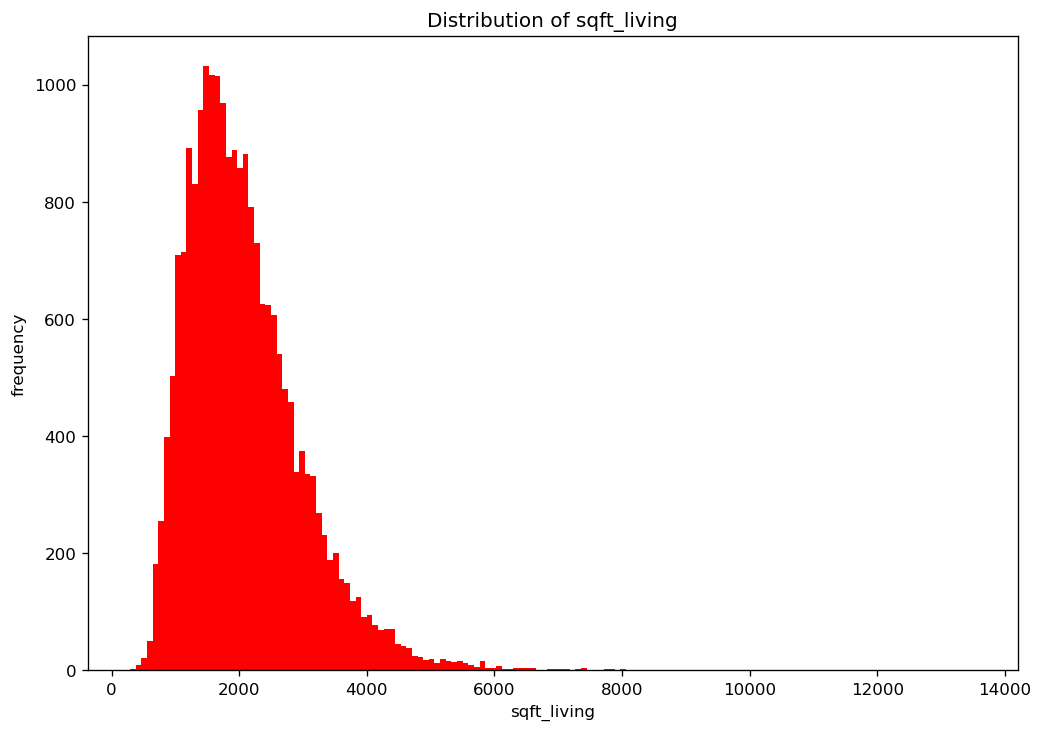

In [1537]:
plt.figure(figsize=(10,7),dpi=120)
plt.hist(data['sqft_living'],bins=150,color='red')
plt.xlabel('sqft_living')
plt.ylabel('frequency')
plt.title('Distribution of sqft_living')
plt.show()


In [1538]:
def log_transform(sample_data):
    return np.log(sample_data)

In [1539]:
data['Transformed_sqft_living']=data['sqft_living'].map(log_transform)

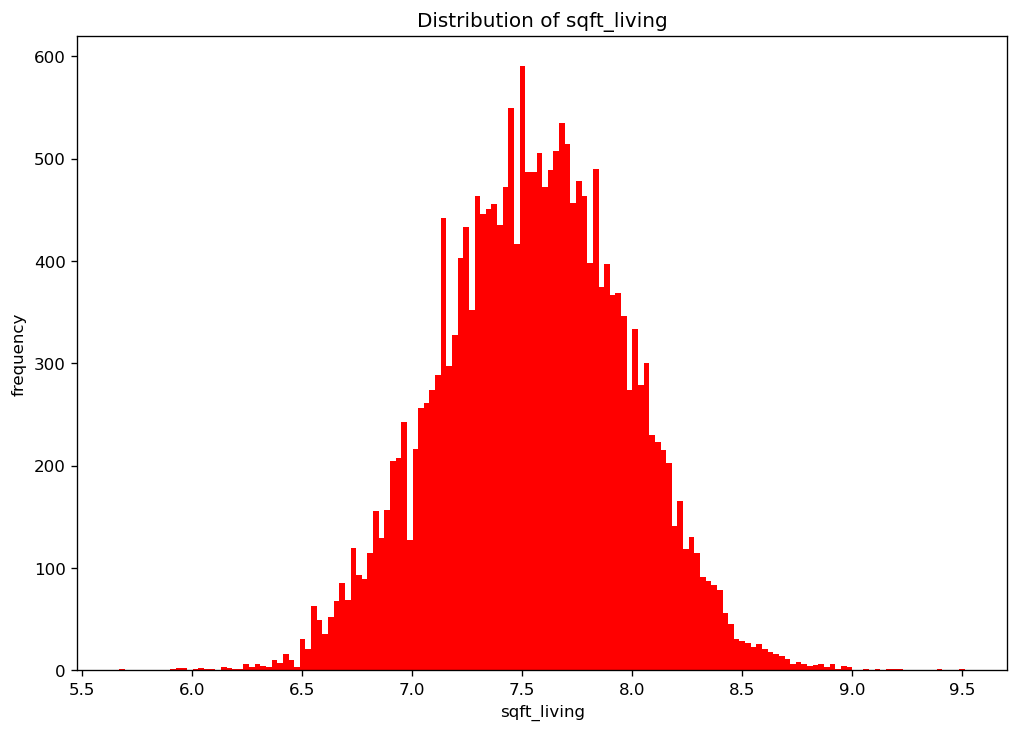

In [1540]:
plt.figure(figsize=(10,7),dpi=120)
plt.hist(data['Transformed_sqft_living'],bins=150,color='red')
plt.xlabel('sqft_living')
plt.ylabel('frequency')
plt.title('Distribution of sqft_living')
plt.show()

In [1541]:
#sqft_lot

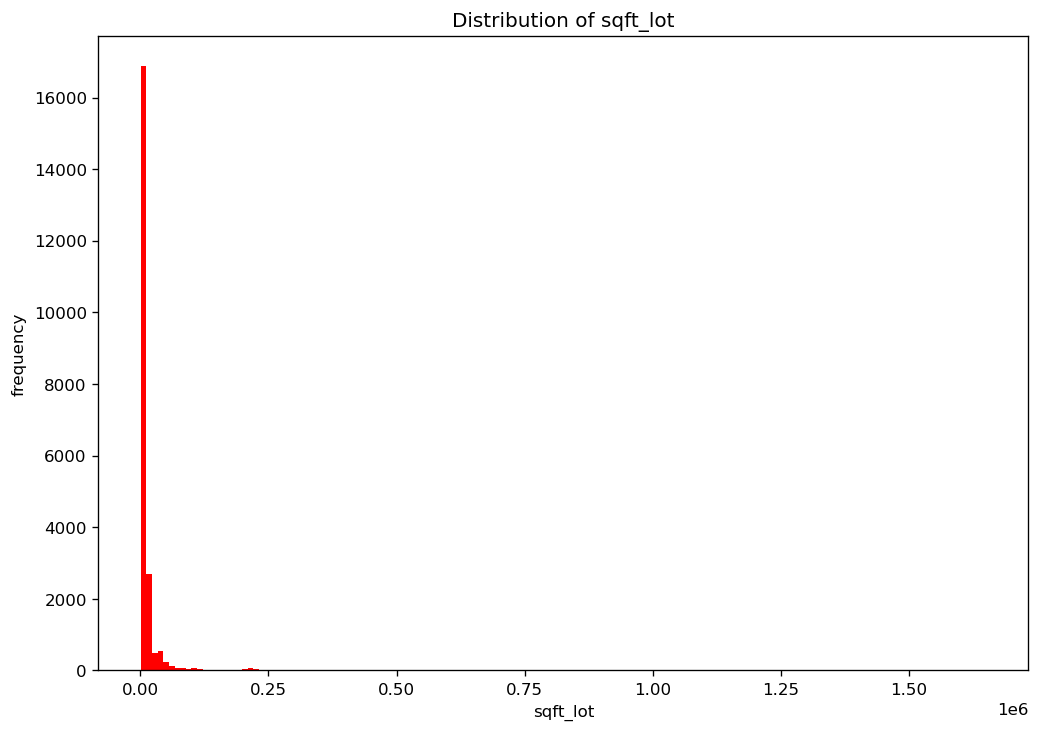

In [1542]:
plt.figure(figsize=(10,7),dpi=120)
plt.hist(data['sqft_lot'],bins=150,color='red')
plt.xlabel('sqft_lot')
plt.ylabel('frequency')
plt.title('Distribution of sqft_lot')
plt.show()

In [1543]:
def log_transform(sample_data):
    return np.log(sample_data)

In [1544]:
data['Transformed_sqft_lot']=data['sqft_lot'].map(log_transform)

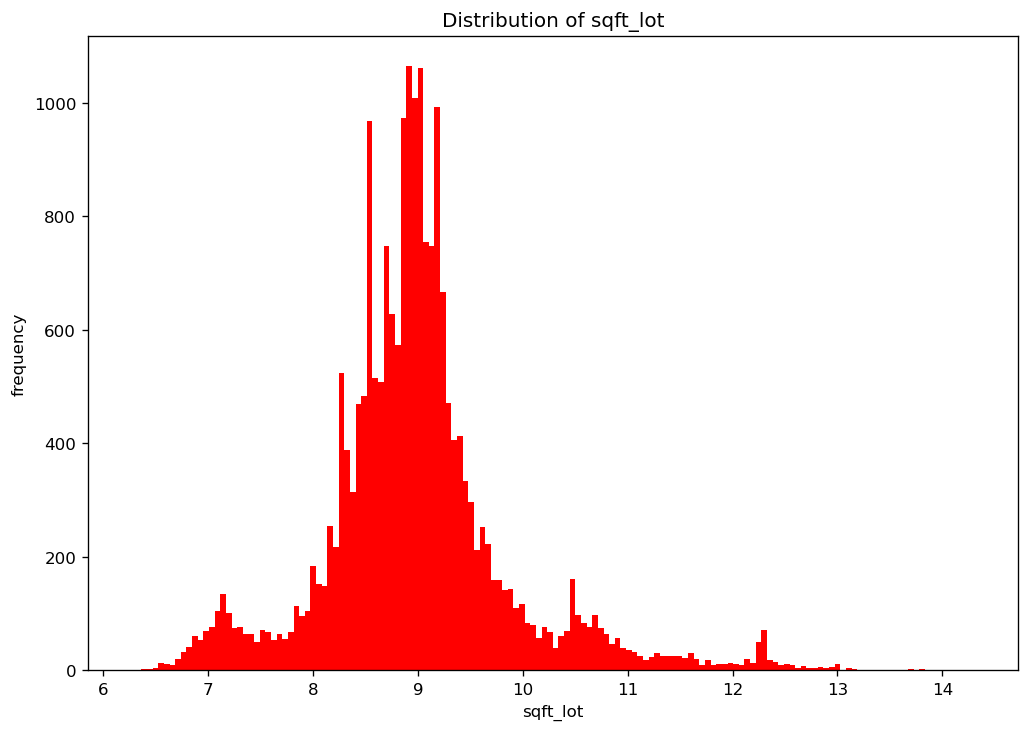

In [1545]:
plt.figure(figsize=(10,7),dpi=120)
plt.hist(data['Transformed_sqft_lot'],bins=150,color='red')
plt.xlabel('sqft_lot')
plt.ylabel('frequency')
plt.title('Distribution of sqft_lot')
plt.show()

In [1546]:
#sqft_above

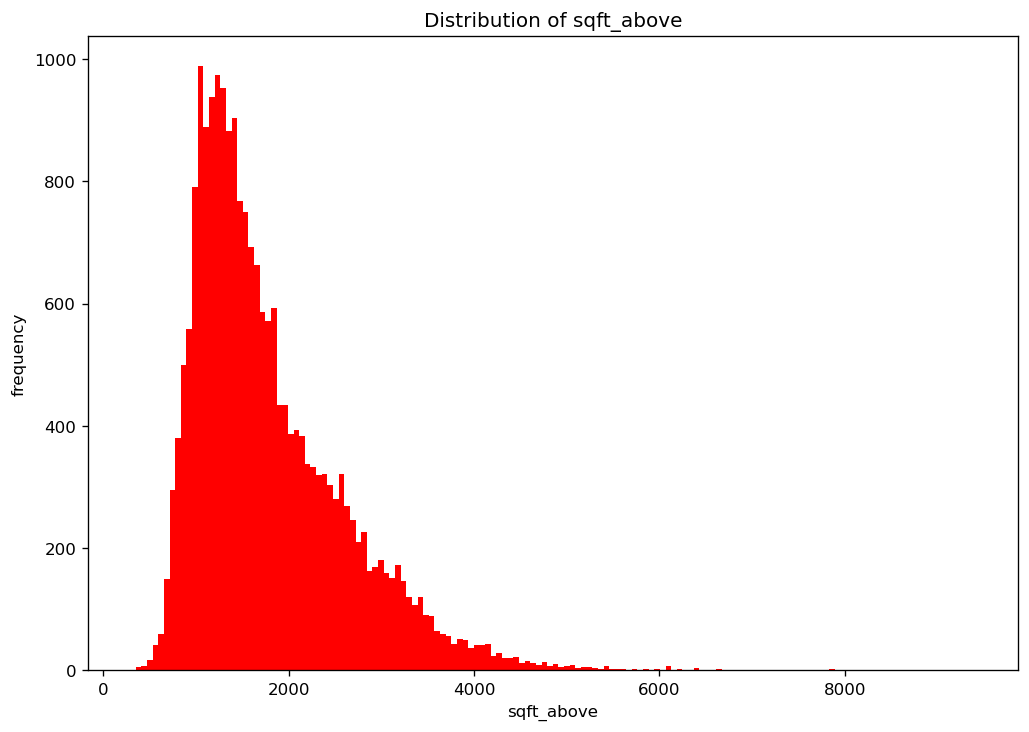

In [1547]:
plt.figure(figsize=(10,7),dpi=120)
plt.hist(data['sqft_above'],bins=150,color='red')
plt.xlabel('sqft_above')
plt.ylabel('frequency')
plt.title('Distribution of sqft_above')
plt.show()

In [1548]:
def log_transform(sample_data):
    return np.log(sample_data)

In [1549]:
data['Transformed_sqft_above']=data['sqft_above'].map(log_transform)

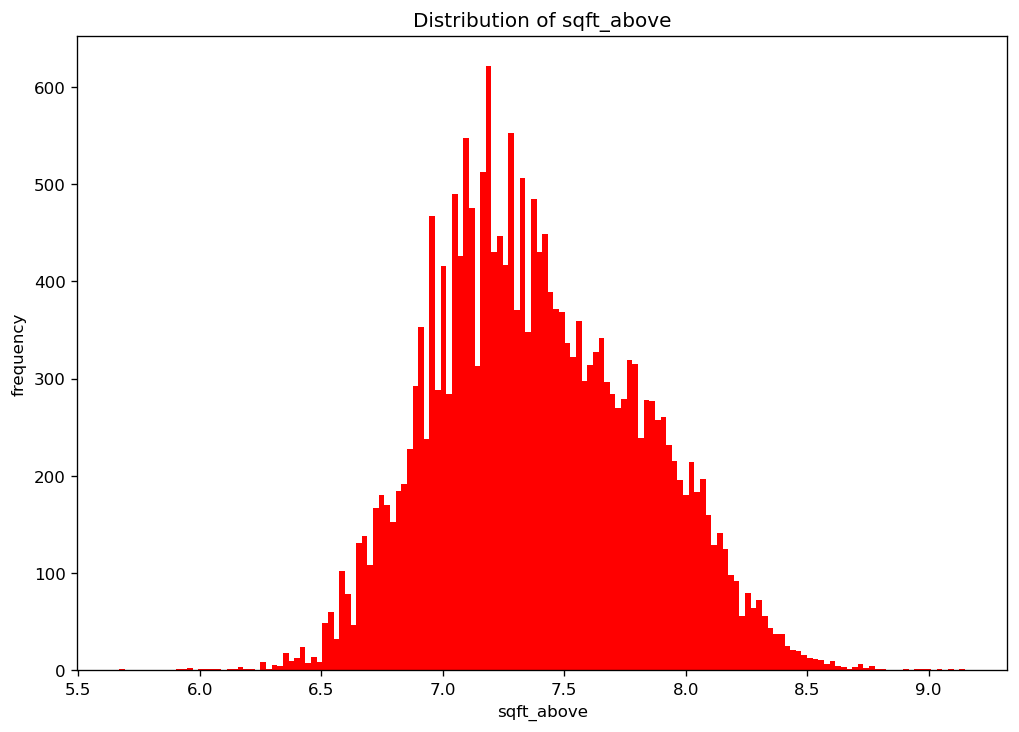

In [1550]:
plt.figure(figsize=(10,7),dpi=120)
plt.hist(data['Transformed_sqft_above'],bins=150,color='red')
plt.xlabel('sqft_above')
plt.ylabel('frequency')
plt.title('Distribution of sqft_above')
plt.show()

In [1551]:
#long

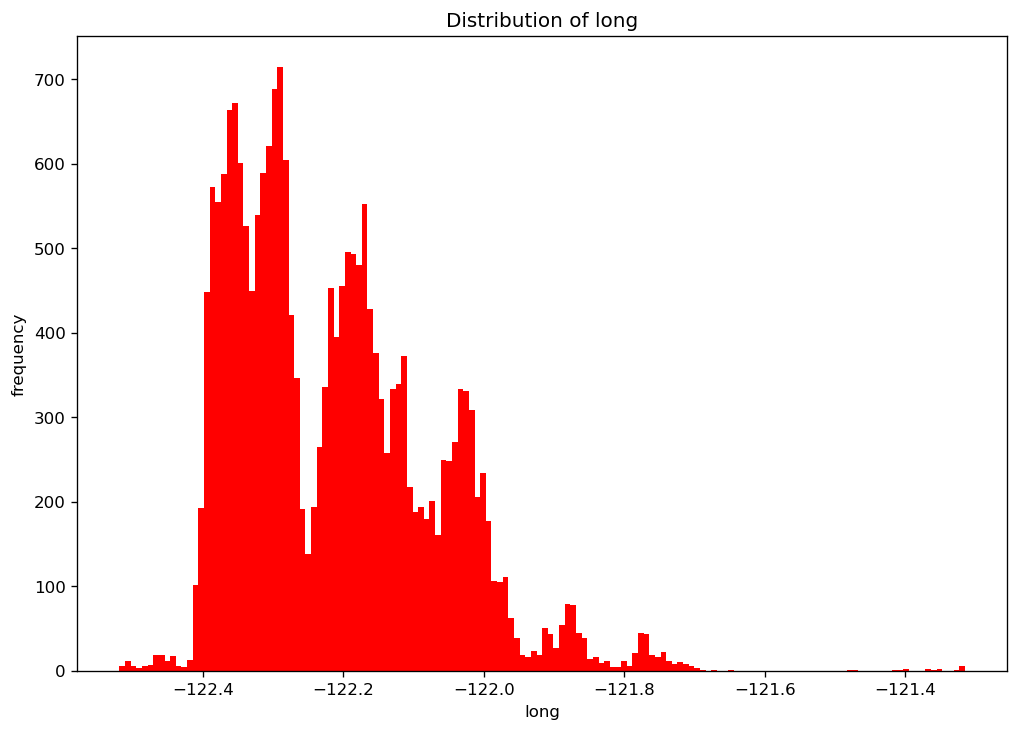

In [1552]:
plt.figure(figsize=(10,7),dpi=120)
plt.hist(data['long'],bins=150,color='red')
plt.xlabel('long')
plt.ylabel('frequency')
plt.title('Distribution of long')
plt.show()

In [1553]:
def log_transform(sample_data):
    return np.log(sample_data)

In [1554]:
data['Transformed_long']=data['long'].abs().map(log_transform)

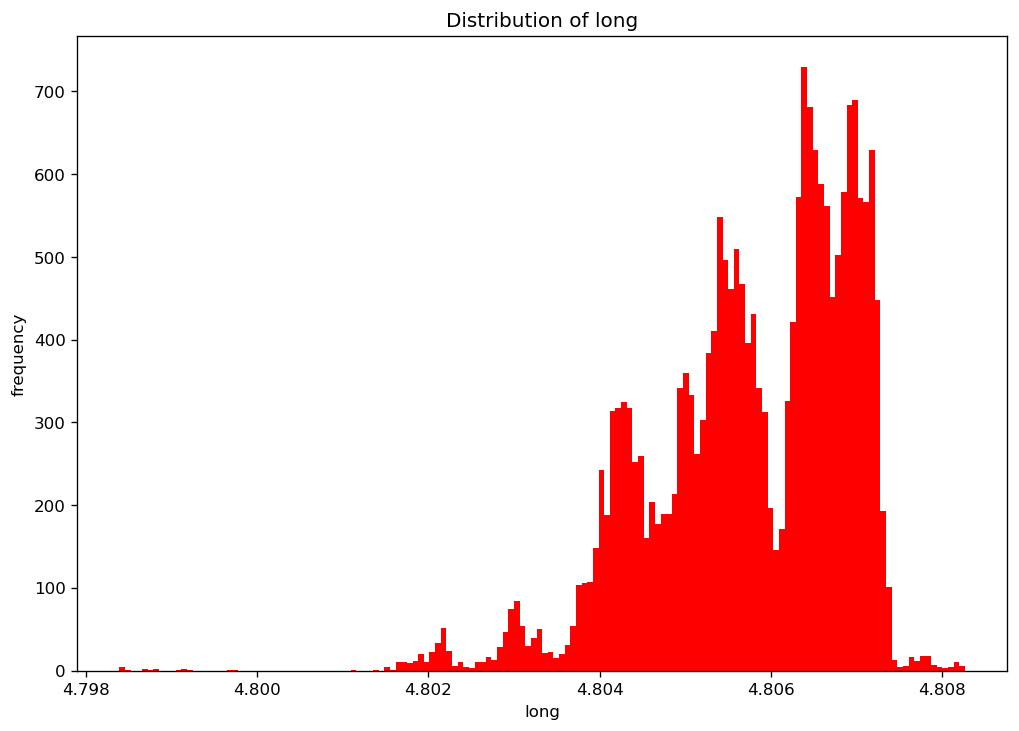

In [1555]:
plt.figure(figsize=(10,7),dpi=120)
plt.hist(data['Transformed_long'],bins=150,color='red')
plt.xlabel('long')
plt.ylabel('frequency')
plt.title('Distribution of long')
plt.show()

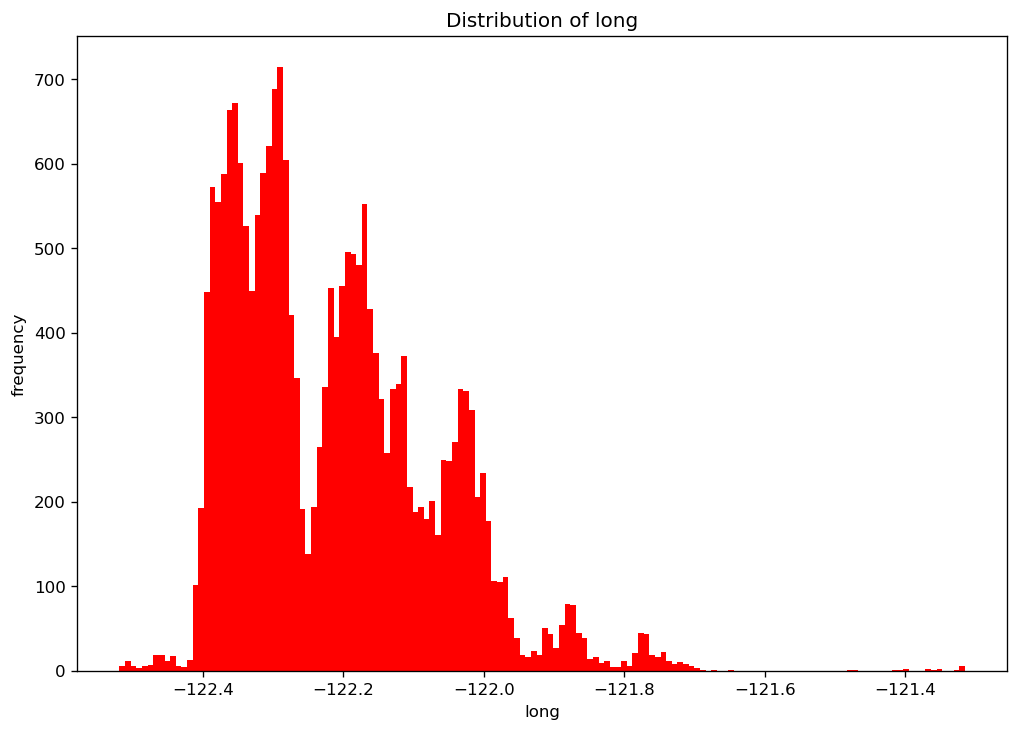

In [1556]:
#sqft_living15
plt.figure(figsize=(10,7),dpi=120)
plt.hist(data['long'],bins=150,color='red')
plt.xlabel('long')
plt.ylabel('frequency')
plt.title('Distribution of long')
plt.show()

In [1557]:
def log_transform(sample_data):
    return np.log(sample_data)

In [1558]:
data['Transformed_sqft_living15']=data['sqft_living15'].map(log_transform)

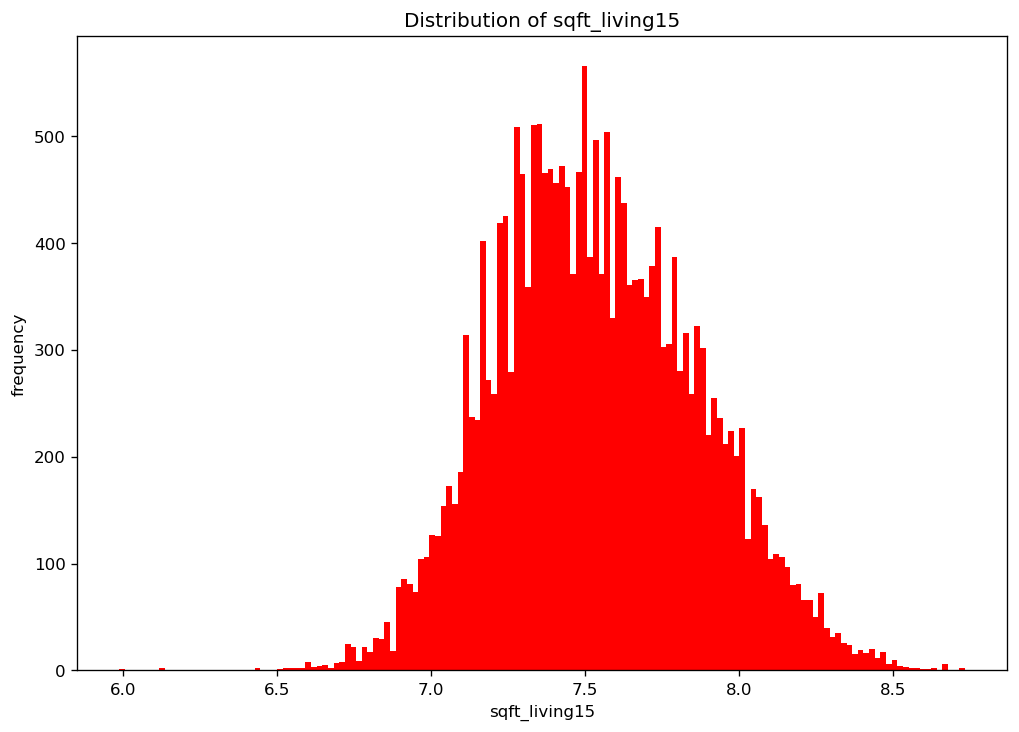

In [1559]:
plt.figure(figsize=(10,7),dpi=120)
plt.hist(data['Transformed_sqft_living15'],bins=150,color='red')
plt.xlabel('sqft_living15')
plt.ylabel('frequency')
plt.title('Distribution of sqft_living15')
plt.show()

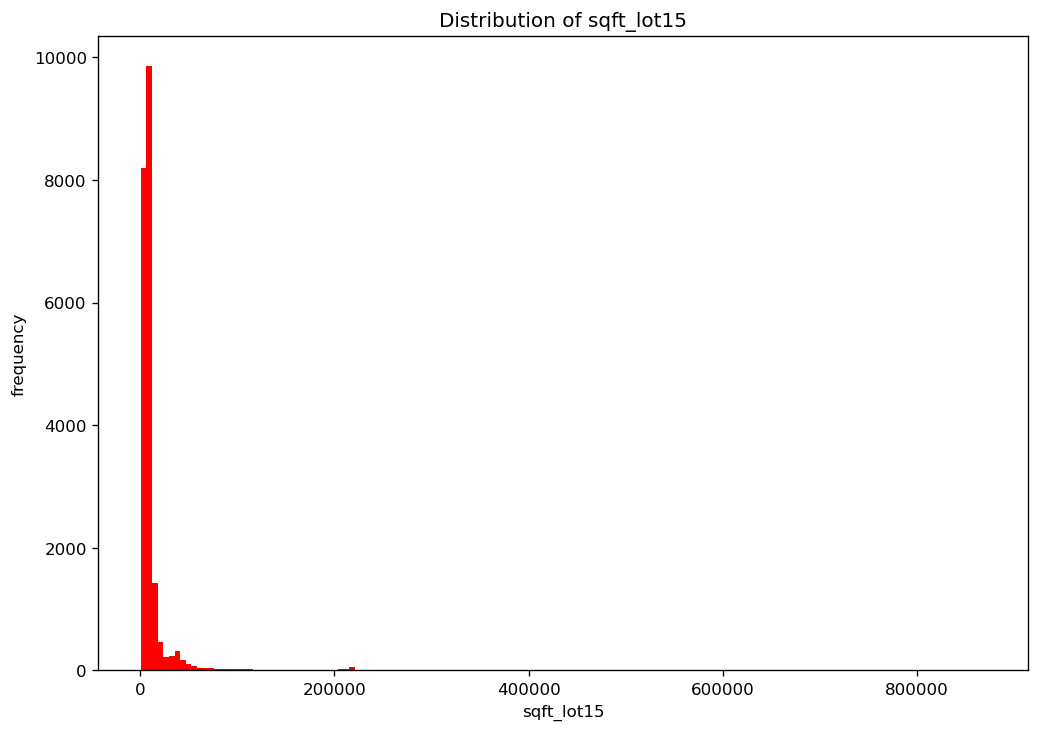

In [1560]:
#sqft_lot15
plt.figure(figsize=(10,7),dpi=120)
plt.hist(data['sqft_lot15'],bins=150,color='red')
plt.xlabel('sqft_lot15')
plt.ylabel('frequency')
plt.title('Distribution of sqft_lot15')
plt.show()

In [1561]:
def log_transform(sample_data):
    return np.log(sample_data)

In [1562]:
data['Transformed_sqft_lot15']=data['sqft_lot15'].map(log_transform)

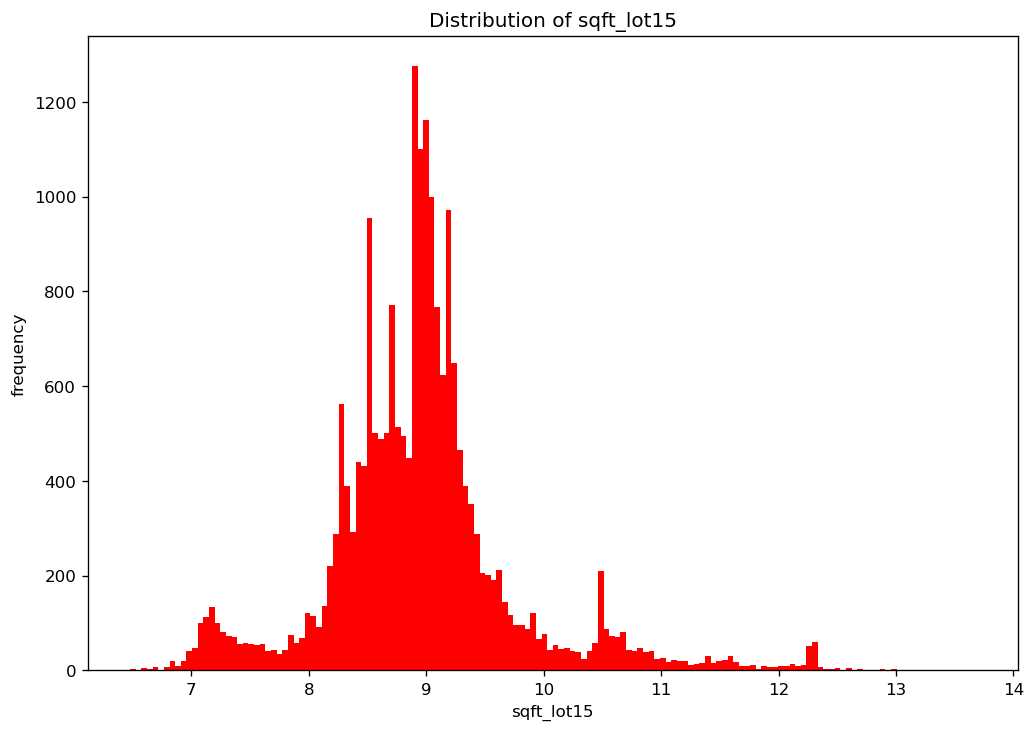

In [1563]:
plt.figure(figsize=(10,7),dpi=120)
plt.hist(data['Transformed_sqft_lot15'],bins=150,color='red')
plt.xlabel('sqft_lot15')
plt.ylabel('frequency')
plt.title('Distribution of sqft_lot15')
plt.show()

In [1564]:
#data.drop(columns=['sqft_living','sqft_lot','sqft_above','long','sqft_living15','sqft_lot15'],inplace=True)

# Data Preprocessing

In [1565]:
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,Transformed_sqft_living,Transformed_sqft_lot,Transformed_sqft_above,Transformed_long,Transformed_sqft_living15,Transformed_sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0,3.0,...,47.5112,-122.257,1340.0,5650.0,7.073270,8.639411,7.073270,4.806125,7.200425,8.639411
1,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0,3.0,...,47.7210,-122.319,1690.0,7639.0,7.851661,8.887653,7.682482,4.806632,7.432484,8.941022
2,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0,3.0,...,47.7379,-122.233,2720.0,8062.0,6.646391,9.210340,6.646391,4.805929,7.908387,8.994917
3,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0,5.0,...,47.5208,-122.393,1360.0,5000.0,7.580700,8.517193,6.956545,4.807237,7.215240,8.517193
4,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0,3.0,...,47.6168,-122.045,1800.0,7503.0,7.426549,8.997147,7.426549,4.804390,7.495542,8.923058
5,20140512T000000,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0,3.0,...,47.6561,-122.005,4760.0,101930.0,8.597851,11.532042,8.266164,4.804062,8.468003,11.532042
6,20140627T000000,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,0,3.0,...,47.3097,-122.327,2238.0,6819.0,7.447168,8.827468,7.447168,4.806698,7.713338,8.827468
7,20150115T000000,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,0,3.0,...,47.4095,-122.315,1650.0,9711.0,6.966024,9.181015,6.966024,4.806600,7.408531,9.181015
8,20150415T000000,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,0,3.0,...,47.5123,-122.337,1780.0,8113.0,7.484369,8.918650,6.956545,4.806780,7.484369,9.001223
9,20150312T000000,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,0,3.0,...,47.3684,-122.031,2390.0,7570.0,7.544332,8.788746,7.544332,4.804275,7.779049,8.931948


In [1566]:
data['ever_renovated']=np.where(data['yr_renovated']==0,'No','Yes')

In [1567]:
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,Transformed_sqft_living,Transformed_sqft_lot,Transformed_sqft_above,Transformed_long,Transformed_sqft_living15,Transformed_sqft_lot15,ever_renovated
0,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0,3.0,...,-122.257,1340.0,5650.0,7.073270,8.639411,7.073270,4.806125,7.200425,8.639411,No
1,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0,3.0,...,-122.319,1690.0,7639.0,7.851661,8.887653,7.682482,4.806632,7.432484,8.941022,Yes
2,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0,3.0,...,-122.233,2720.0,8062.0,6.646391,9.210340,6.646391,4.805929,7.908387,8.994917,No
3,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0,5.0,...,-122.393,1360.0,5000.0,7.580700,8.517193,6.956545,4.807237,7.215240,8.517193,No
4,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0,3.0,...,-122.045,1800.0,7503.0,7.426549,8.997147,7.426549,4.804390,7.495542,8.923058,No
5,20140512T000000,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0,3.0,...,-122.005,4760.0,101930.0,8.597851,11.532042,8.266164,4.804062,8.468003,11.532042,No
6,20140627T000000,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,0,3.0,...,-122.327,2238.0,6819.0,7.447168,8.827468,7.447168,4.806698,7.713338,8.827468,No
7,20150115T000000,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,0,3.0,...,-122.315,1650.0,9711.0,6.966024,9.181015,6.966024,4.806600,7.408531,9.181015,No
8,20150415T000000,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,0,3.0,...,-122.337,1780.0,8113.0,7.484369,8.918650,6.956545,4.806780,7.484369,9.001223,No
9,20150312T000000,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,0,3.0,...,-122.031,2390.0,7570.0,7.544332,8.788746,7.544332,4.804275,7.779049,8.931948,No


In [1568]:
data['yr_purchase']=pd.DatetimeIndex(data['date']).year

In [1569]:
data['years_since_renovation']=np.where(data['ever_renovated']=='Yes',abs(data['yr_purchase']-data['yr_renovated']),0)

In [1570]:
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_lot15,Transformed_sqft_living,Transformed_sqft_lot,Transformed_sqft_above,Transformed_long,Transformed_sqft_living15,Transformed_sqft_lot15,ever_renovated,yr_purchase,years_since_renovation
0,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0,3.0,...,5650.0,7.073270,8.639411,7.073270,4.806125,7.200425,8.639411,No,2014,0.0
1,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0,3.0,...,7639.0,7.851661,8.887653,7.682482,4.806632,7.432484,8.941022,Yes,2014,23.0
2,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0,3.0,...,8062.0,6.646391,9.210340,6.646391,4.805929,7.908387,8.994917,No,2015,0.0
3,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0,5.0,...,5000.0,7.580700,8.517193,6.956545,4.807237,7.215240,8.517193,No,2014,0.0
4,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0,3.0,...,7503.0,7.426549,8.997147,7.426549,4.804390,7.495542,8.923058,No,2015,0.0
5,20140512T000000,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0,3.0,...,101930.0,8.597851,11.532042,8.266164,4.804062,8.468003,11.532042,No,2014,0.0
6,20140627T000000,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,0,3.0,...,6819.0,7.447168,8.827468,7.447168,4.806698,7.713338,8.827468,No,2014,0.0
7,20150115T000000,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,0,3.0,...,9711.0,6.966024,9.181015,6.966024,4.806600,7.408531,9.181015,No,2015,0.0
8,20150415T000000,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,0,3.0,...,8113.0,7.484369,8.918650,6.956545,4.806780,7.484369,9.001223,No,2015,0.0
9,20150312T000000,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,0,3.0,...,7570.0,7.544332,8.788746,7.544332,4.804275,7.779049,8.931948,No,2015,0.0


In [1571]:
data.drop(columns=['yr_purchase','date','yr_renovated','ever_renovated'],inplace=True)

In [1572]:
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,Transformed_sqft_living,Transformed_sqft_lot,Transformed_sqft_above,Transformed_long,Transformed_sqft_living15,Transformed_sqft_lot15,years_since_renovation
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0,3.0,7.0,...,-122.257,1340.0,5650.0,7.073270,8.639411,7.073270,4.806125,7.200425,8.639411,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0,3.0,7.0,...,-122.319,1690.0,7639.0,7.851661,8.887653,7.682482,4.806632,7.432484,8.941022,23.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0,3.0,6.0,...,-122.233,2720.0,8062.0,6.646391,9.210340,6.646391,4.805929,7.908387,8.994917,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0,5.0,7.0,...,-122.393,1360.0,5000.0,7.580700,8.517193,6.956545,4.807237,7.215240,8.517193,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0,3.0,8.0,...,-122.045,1800.0,7503.0,7.426549,8.997147,7.426549,4.804390,7.495542,8.923058,0.0
5,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0,3.0,11.0,...,-122.005,4760.0,101930.0,8.597851,11.532042,8.266164,4.804062,8.468003,11.532042,0.0
6,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,0,3.0,7.0,...,-122.327,2238.0,6819.0,7.447168,8.827468,7.447168,4.806698,7.713338,8.827468,0.0
7,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,0,3.0,7.0,...,-122.315,1650.0,9711.0,6.966024,9.181015,6.966024,4.806600,7.408531,9.181015,0.0
8,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,0,3.0,7.0,...,-122.337,1780.0,8113.0,7.484369,8.918650,6.956545,4.806780,7.484369,9.001223,0.0
9,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,0,3.0,7.0,...,-122.031,2390.0,7570.0,7.544332,8.788746,7.544332,4.804275,7.779049,8.931948,0.0


In [1573]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      21613 non-null  float64
 1   bedrooms                   21613 non-null  float64
 2   bathrooms                  21613 non-null  float64
 3   sqft_living                21613 non-null  float64
 4   sqft_lot                   21613 non-null  float64
 5   floors                     21613 non-null  float64
 6   waterfront                 21613 non-null  float64
 7   view                       21613 non-null  int64  
 8   condition                  21613 non-null  float64
 9   grade                      21613 non-null  float64
 10  sqft_above                 21613 non-null  float64
 11  yr_built                   21613 non-null  float64
 12  zipcode                    21613 non-null  float64
 13  lat                        21613 non-null  flo

In [1574]:
data=pd.get_dummies(data,columns=['waterfront','view','condition'],drop_first=True)

In [1575]:
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,zipcode,...,years_since_renovation,waterfront_1.0,view_1,view_2,view_3,view_4,condition_2.0,condition_3.0,condition_4.0,condition_5.0
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,7.0,1180.0,1955.0,98178.0,...,0.0,0,0,0,0,0,0,1,0,0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,7.0,2170.0,1951.0,98125.0,...,23.0,0,0,0,0,0,0,1,0,0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,6.0,770.0,1933.0,98028.0,...,0.0,0,0,0,0,0,0,1,0,0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,7.0,1050.0,1965.0,98136.0,...,0.0,0,0,0,0,0,0,0,0,1
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,8.0,1680.0,1987.0,98074.0,...,0.0,0,0,0,0,0,0,1,0,0


# Binning

In [1576]:
Zip_table=data.groupby('zipcode').agg({'price':'mean'}).sort_values('price',ascending=True)

In [1577]:
Zip_table.head()

,price
zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [1578]:
Zip_table['Zipcode_Group']=pd.cut(Zip_table['price'],bins=10,labels=['Zipcode_Group0',
                                                                         'Zipcode_Group1',
                                                                         'Zipcode_Group2',
                                                                         'Zipcode_Group3',
                                                                         'Zipcode_Group4',
                                                                          'Zipcode_Group5',
                                                                          'Zipcode_Group6',
                                                                          'Zipcode_Group7',
                                                                          'Zipcode_Group8',
                                                                          'Zipcode_Group9'],include_lowest=True)

In [1579]:
Zip_table=Zip_table.drop(columns="price")

In [1580]:
data=pd.merge(data,Zip_table,
             left_on='zipcode',
             how='left',
             right_index=True)

In [1581]:
data=data.drop(columns="zipcode")

In [1582]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,lat,...,waterfront_1.0,view_1,view_2,view_3,view_4,condition_2.0,condition_3.0,condition_4.0,condition_5.0,Zipcode_Group
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,7.0,1180.0,1955.0,47.5112,...,0,0,0,0,0,0,1,0,0,Zipcode_Group0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,7.0,2170.0,1951.0,47.7210,...,0,0,0,0,0,0,1,0,0,Zipcode_Group1
2,180000.0,2.0,1.00,770.0,10000.0,1.0,6.0,770.0,1933.0,47.7379,...,0,0,0,0,0,0,1,0,0,Zipcode_Group1
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,7.0,1050.0,1965.0,47.5208,...,0,0,0,0,0,0,0,0,1,Zipcode_Group1
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,8.0,1680.0,1987.0,47.6168,...,0,0,0,0,0,0,1,0,0,Zipcode_Group2


In [1583]:
data=pd.get_dummies(data,columns=['Zipcode_Group'],
                   drop_first=True)

In [1584]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,lat,...,condition_5.0,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,7.0,1180.0,1955.0,47.5112,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,7.0,2170.0,1951.0,47.7210,...,0,1,0,0,0,0,0,0,0,0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,6.0,770.0,1933.0,47.7379,...,0,1,0,0,0,0,0,0,0,0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,7.0,1050.0,1965.0,47.5208,...,1,1,0,0,0,0,0,0,0,0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,8.0,1680.0,1987.0,47.6168,...,0,0,1,0,0,0,0,0,0,0


In [1585]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         21613 non-null  float64
 1   bedrooms                      21613 non-null  float64
 2   bathrooms                     21613 non-null  float64
 3   sqft_living                   21613 non-null  float64
 4   sqft_lot                      21613 non-null  float64
 5   floors                        21613 non-null  float64
 6   grade                         21613 non-null  float64
 7   sqft_above                    21613 non-null  float64
 8   yr_built                      21613 non-null  float64
 9   lat                           21613 non-null  float64
 10  long                          21613 non-null  float64
 11  sqft_living15                 21613 non-null  float64
 12  sqft_lot15                    21613 non-null  float64
 13  T

# Seperating X and Y variable

In [1586]:
Y=data.iloc[:,0]

In [1587]:
Y.head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1225000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: price, dtype: float64

In [1588]:
X=data.iloc[:,1:38]

In [1589]:
X.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,lat,long,...,condition_5.0,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
0,3.0,1.00,1180.0,5650.0,1.0,7.0,1180.0,1955.0,47.5112,-122.257,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.25,2570.0,7242.0,2.0,7.0,2170.0,1951.0,47.7210,-122.319,...,0,1,0,0,0,0,0,0,0,0
2,2.0,1.00,770.0,10000.0,1.0,6.0,770.0,1933.0,47.7379,-122.233,...,0,1,0,0,0,0,0,0,0,0
3,4.0,3.00,1960.0,5000.0,1.0,7.0,1050.0,1965.0,47.5208,-122.393,...,1,1,0,0,0,0,0,0,0,0
4,3.0,2.00,1680.0,8080.0,1.0,8.0,1680.0,1987.0,47.6168,-122.045,...,0,0,1,0,0,0,0,0,0,0
5,4.0,4.50,5420.0,101930.0,1.0,11.0,3890.0,2001.0,47.6561,-122.005,...,0,0,1,0,0,0,0,0,0,0
6,3.0,2.25,1715.0,6819.0,2.0,7.0,1715.0,1995.0,47.3097,-122.327,...,0,0,0,0,0,0,0,0,0,0
7,3.0,1.50,1060.0,9711.0,1.0,7.0,1060.0,1963.0,47.4095,-122.315,...,0,0,0,0,0,0,0,0,0,0
8,3.0,1.00,1780.0,7470.0,1.0,7.0,1050.0,1960.0,47.5123,-122.337,...,0,0,0,0,0,0,0,0,0,0
9,3.0,2.50,1890.0,6560.0,2.0,7.0,1890.0,2003.0,47.3684,-122.031,...,0,0,0,0,0,0,0,0,0,0


# Train and Test Data

In [1590]:
from sklearn.model_selection import train_test_split as tts

In [1591]:
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.3)

In [1592]:
X_train.shape

(15129, 37)

In [1593]:
X_test.shape

(6484, 37)

In [1594]:
Y_train.shape

(15129,)

In [1595]:
Y_test.shape

(6484,)

# Feature Scaling

In [1596]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,lat,long,...,condition_5.0,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.0,21613.0,21613.0,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,7.656873,1788.390691,1971.005136,47.560053,-122.213896,...,0.078703,0.301346,0.199186,0.052052,0.025494,0.014667,0.0,0.0,0.0,0.002313
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,1.175459,828.090978,29.373411,0.138564,0.140828,...,0.269280,0.458853,0.399397,0.222137,0.157623,0.120219,0.0,0.0,0.0,0.048043
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,1900.000000,47.155900,-122.519000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,7.000000,1190.000000,1951.000000,47.471000,-122.328000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,7.000000,1560.000000,1975.000000,47.571800,-122.230000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,8.000000,2210.000000,1997.000000,47.678000,-122.125000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,13.000000,9410.000000,2015.000000,47.777600,-121.315000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


# Standardisation

In [1597]:
from sklearn import preprocessing

In [1598]:
scale=preprocessing.StandardScaler()

In [1599]:
X_train=scale.fit_transform(X_train)

In [1600]:
X_train

array([[ 0.67292422,  0.17614852,  0.28605525, ...,  0.        ,
         0.        , -0.04675478],
       [ 0.67292422,  0.50094451,  0.59098049, ...,  0.        ,
         0.        , -0.04675478],
       [ 0.67292422,  0.82574049,  0.14448282, ...,  0.        ,
         0.        , -0.04675478],
       ...,
       [-0.39861251,  0.50094451, -0.66139103, ...,  0.        ,
         0.        , -0.04675478],
       [ 0.67292422,  1.47533245,  1.62554826, ...,  0.        ,
         0.        , -0.04675478],
       [-0.39861251, -0.14864746, -0.67228122, ...,  0.        ,
         0.        , -0.04675478]])

In [1601]:
X_test=scale.fit_transform(X_test)

In [1602]:
X_test

array([[ 1.76890393,  0.49853615,  0.61397211, ...,  0.        ,
         0.        , -0.05127115],
       [-0.39905242, -0.47403683, -0.27852643, ...,  0.        ,
         0.        , -0.05127115],
       [-0.39905242, -0.47403683, -0.09893831, ...,  0.        ,
         0.        , -0.05127115],
       ...,
       [ 0.68492575,  0.49853615,  0.38540541, ...,  0.        ,
         0.        , -0.05127115],
       [-1.4830306 ,  0.82272714, -0.35471533, ...,  0.        ,
         0.        , -0.05127115],
       [-0.39905242,  0.49853615, -0.36559945, ...,  0.        ,
         0.        , -0.05127115]])

# Scaling the dataset

In [1603]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Y=data['price']
X=scaler.fit_transform(data.drop(columns=['price']))
X=pd.DataFrame(data=X,columns=data.drop(columns=['price']).columns)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,lat,long,...,condition_5.0,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.558836,-0.734708,-0.544898,-0.352572,-0.306079,...,-0.292277,-0.656753,-0.498727,-0.234329,-0.161743,-0.122006,0.0,0.0,0.0,-0.048154
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.558836,0.460841,-0.681079,1.161568,-0.746341,...,-0.292277,1.522642,-0.498727,-0.234329,-0.161743,-0.122006,0.0,0.0,0.0,-0.048154
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-1.409587,-1.229834,-1.293892,1.283537,-0.135655,...,-0.292277,1.522642,-0.498727,-0.234329,-0.161743,-0.122006,0.0,0.0,0.0,-0.048154
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.558836,-0.891699,-0.204446,-0.283288,-1.271816,...,3.421411,1.522642,-0.498727,-0.234329,-0.161743,-0.122006,0.0,0.0,0.0,-0.048154
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,0.291916,-0.130895,0.544548,0.409550,1.199335,...,-0.292277,-0.656753,2.005104,-0.234329,-0.161743,-0.122006,0.0,0.0,0.0,-0.048154


# Checking & Removing multicollinearity

In [1604]:
X.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,lat,long,...,condition_5.0,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,0.356967,0.477600,0.154178,-0.008931,0.129473,...,0.028119,-0.051315,0.059357,0.050795,0.070279,0.063499,NaN,NaN,NaN,0.035682
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.664983,0.685342,0.506019,0.024573,0.223042,...,-0.034292,0.000142,0.110369,0.073064,0.091198,0.065403,NaN,NaN,NaN,0.067855
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.762704,0.876597,0.318049,0.052529,0.240223,...,-0.018136,-0.037264,0.154376,0.093154,0.128571,0.110143,NaN,NaN,NaN,0.090234
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.113621,0.183512,0.053080,-0.085683,0.229521,...,-0.014497,0.025103,-0.001279,-0.038813,-0.022089,-0.005899,NaN,NaN,NaN,0.002670
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.458183,0.523885,0.489319,0.049614,0.125419,...,-0.120545,0.088622,0.044196,0.053774,0.047369,-0.014039,NaN,NaN,NaN,0.005858
grade,0.356967,0.664983,0.762704,0.113621,0.458183,1.000000,0.755923,0.446963,0.114084,0.198372,...,-0.083520,-0.020007,0.207185,0.138400,0.144611,0.106996,NaN,NaN,NaN,0.077965
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.755923,1.000000,0.423898,-0.000816,0.343803,...,-0.088453,-0.036872,0.156918,0.044723,0.089293,0.093036,NaN,NaN,NaN,0.087373
yr_built,0.154178,0.506019,0.318049,0.053080,0.489319,0.446963,0.423898,1.000000,-0.148122,0.409356,...,-0.244353,-0.011722,0.054392,-0.087570,-0.070075,0.001931,NaN,NaN,NaN,0.002483
lat,-0.008931,0.024573,0.052529,-0.085683,0.049614,0.114084,-0.000816,-0.148122,1.000000,-0.135512,...,0.025827,0.273903,0.359706,0.080900,0.039521,0.049424,NaN,NaN,NaN,0.022863
long,0.129473,0.223042,0.240223,0.229521,0.125419,0.198372,0.343803,0.409356,-0.135512,1.000000,...,-0.085521,0.025176,0.146312,-0.058284,-0.053959,0.007544,NaN,NaN,NaN,-0.006717


In [1605]:
##pair of independent variables with correlation greater than 0.5
k=X.corr()
z=[[str(i),str(j)]for i in k.columns for j in k.columns if(k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([['bedrooms', 'bathrooms'],
  ['bedrooms', 'sqft_living'],
  ['bedrooms', 'Transformed_sqft_living'],
  ['bedrooms', 'Transformed_sqft_above'],
  ['bathrooms', 'bedrooms'],
  ['bathrooms', 'sqft_living'],
  ['bathrooms', 'floors'],
  ['bathrooms', 'grade'],
  ['bathrooms', 'sqft_above'],
  ['bathrooms', 'yr_built'],
  ['bathrooms', 'sqft_living15'],
  ['bathrooms', 'Transformed_sqft_living'],
  ['bathrooms', 'Transformed_sqft_above'],
  ['bathrooms', 'Transformed_sqft_living15'],
  ['sqft_living', 'bedrooms'],
  ['sqft_living', 'bathrooms'],
  ['sqft_living', 'grade'],
  ['sqft_living', 'sqft_above'],
  ['sqft_living', 'sqft_living15'],
  ['sqft_living', 'Transformed_sqft_living'],
  ['sqft_living', 'Transformed_sqft_above'],
  ['sqft_living', 'Transformed_sqft_living15'],
  ['sqft_lot', 'sqft_lot15'],
  ['sqft_lot', 'Transformed_sqft_lot'],
  ['sqft_lot', 'Transformed_sqft_lot15'],
  ['floors', 'bathrooms'],
  ['floors', 'sqft_above'],
  ['floors', 'Transformed_sqft_above'],
  ['grad

# Calculating VIF

In [1606]:
#Importing Variance_Infraltion_Factor from the statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=X

#Calculating VIF for every column
VIF=pd.Series([variance_inflation_factor(vif_data.values,i)for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

/Users/akashjyotiborah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


bedrooms                        1.806045e+00
bathrooms                       3.403738e+00
sqft_living                     3.952347e+01
sqft_lot                        3.043438e+00
floors                          2.693814e+00
grade                           3.666649e+00
sqft_above                      4.327619e+01
yr_built                        2.514280e+00
lat                             1.842381e+00
long                            1.593278e+06
sqft_living15                   3.318454e+01
sqft_lot15                      3.559510e+00
Transformed_sqft_living         3.553416e+01
Transformed_sqft_lot            1.011920e+01
Transformed_sqft_above          4.031948e+01
Transformed_long                1.592907e+06
Transformed_sqft_living15       3.120773e+01
Transformed_sqft_lot15          1.024218e+01
years_since_renovation          1.092172e+00
waterfront_1.0                  1.564593e+00
view_1                          1.037224e+00
view_2                          1.081005e+00
view_3    

In [1607]:
VIF[VIF==VIF.max()].index[0]

'long'

In [1608]:
def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max() > 5:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data=data.drop(columns=[vif[vif == vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present anymore")
        return data

In [1609]:
for i in range(7):
    vif_data=MC_remover(vif_data)
vif_data.head()

/Users/akashjyotiborah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


long has been removed


/Users/akashjyotiborah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


condition_3.0 has been removed


/Users/akashjyotiborah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


sqft_above has been removed


/Users/akashjyotiborah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


sqft_living15 has been removed


/Users/akashjyotiborah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Transformed_sqft_living has been removed


/Users/akashjyotiborah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Transformed_sqft_lot15 has been removed
sqft_living has been removed


/Users/akashjyotiborah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,bedrooms,bathrooms,sqft_lot,floors,grade,yr_built,lat,sqft_lot15,Transformed_sqft_lot,Transformed_sqft_above,...,condition_5.0,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group6,Zipcode_Group_Zipcode_Group7,Zipcode_Group_Zipcode_Group8,Zipcode_Group_Zipcode_Group9
0,-0.398737,-1.447464,-0.228321,-0.915427,-0.558836,-0.544898,-0.352572,-0.260715,-0.388457,-0.752086,...,-0.292277,-0.656753,-0.498727,-0.234329,-0.161743,-0.122006,0.0,0.0,0.0,-0.048154
1,-0.398737,0.175607,-0.189885,0.936506,-0.558836,-0.681079,1.161568,-0.187868,-0.113368,0.672571,...,-0.292277,1.522642,-0.498727,-0.234329,-0.161743,-0.122006,0.0,0.0,0.0,-0.048154
2,-1.473959,-1.447464,-0.123298,-0.915427,-1.409587,-1.293892,1.283537,-0.172375,0.244219,-1.750353,...,-0.292277,1.522642,-0.498727,-0.234329,-0.161743,-0.122006,0.0,0.0,0.0,-0.048154
3,0.676485,1.149449,-0.244014,-0.915427,-0.558836,-0.204446,-0.283288,-0.284522,-0.523893,-1.025049,...,3.421411,1.522642,-0.498727,-0.234329,-0.161743,-0.122006,0.0,0.0,0.0,-0.048154
4,-0.398737,-0.149007,-0.169653,-0.915427,0.291916,0.544548,0.409550,-0.192849,0.007969,0.074065,...,-0.292277,-0.656753,2.005104,-0.234329,-0.161743,-0.122006,0.0,0.0,0.0,-0.048154


# Remaining Columns

In [1610]:
vif=pd.Series([variance_inflation_factor(vif_data.values,i)for i in range(vif_data.shape[1])],index=vif_data.columns)
vif,len(vif_data.columns)

/Users/akashjyotiborah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


(bedrooms                        1.618017
 bathrooms                       2.765428
 sqft_lot                        2.528236
 floors                          2.484988
 grade                           3.299740
 yr_built                        2.396735
 lat                             1.833827
 sqft_lot15                      2.341876
 Transformed_sqft_lot            3.534321
 Transformed_sqft_above          4.753386
 Transformed_long                1.685322
 Transformed_sqft_living15       2.779915
 years_since_renovation          1.089235
 waterfront_1.0                  1.560513
 view_1                          1.029719
 view_2                          1.062148
 view_3                          1.077546
 view_4                          1.602533
 condition_2.0                   1.025591
 condition_4.0                   1.224804
 condition_5.0                   1.175870
 Zipcode_Group_Zipcode_Group1    1.866276
 Zipcode_Group_Zipcode_Group2    2.101761
 Zipcode_Group_Zipcode_Group3    1

In [1611]:
vif_data.drop(columns=['Zipcode_Group_Zipcode_Group6','Zipcode_Group_Zipcode_Group7','Zipcode_Group_Zipcode_Group8',],inplace=True)
vif_data.head()

,bedrooms,bathrooms,sqft_lot,floors,grade,yr_built,lat,sqft_lot15,Transformed_sqft_lot,Transformed_sqft_above,...,view_4,condition_2.0,condition_4.0,condition_5.0,Zipcode_Group_Zipcode_Group1,Zipcode_Group_Zipcode_Group2,Zipcode_Group_Zipcode_Group3,Zipcode_Group_Zipcode_Group4,Zipcode_Group_Zipcode_Group5,Zipcode_Group_Zipcode_Group9
0,-0.398737,-1.447464,-0.228321,-0.915427,-0.558836,-0.544898,-0.352572,-0.260715,-0.388457,-0.752086,...,-0.122396,-0.089566,-0.596999,-0.292277,-0.656753,-0.498727,-0.234329,-0.161743,-0.122006,-0.048154
1,-0.398737,0.175607,-0.189885,0.936506,-0.558836,-0.681079,1.161568,-0.187868,-0.113368,0.672571,...,-0.122396,-0.089566,-0.596999,-0.292277,1.522642,-0.498727,-0.234329,-0.161743,-0.122006,-0.048154
2,-1.473959,-1.447464,-0.123298,-0.915427,-1.409587,-1.293892,1.283537,-0.172375,0.244219,-1.750353,...,-0.122396,-0.089566,-0.596999,-0.292277,1.522642,-0.498727,-0.234329,-0.161743,-0.122006,-0.048154
3,0.676485,1.149449,-0.244014,-0.915427,-0.558836,-0.204446,-0.283288,-0.284522,-0.523893,-1.025049,...,-0.122396,-0.089566,-0.596999,3.421411,1.522642,-0.498727,-0.234329,-0.161743,-0.122006,-0.048154
4,-0.398737,-0.149007,-0.169653,-0.915427,0.291916,0.544548,0.409550,-0.192849,0.007969,0.074065,...,-0.122396,-0.089566,-0.596999,-0.292277,-0.656753,2.005104,-0.234329,-0.161743,-0.122006,-0.048154


# Training the model

In [1612]:
X=vif_data
Y=data['price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15129, 27), (6484, 27), (15129,), (6484,))

# Linear Regression

In [1613]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=True)
lr.coef_
predictions=lr.predict(x_test)
lr.score(x_test,y_test)

0.7614936715080203

# Verifying the assumptions of linear regression

# 1. Residuals

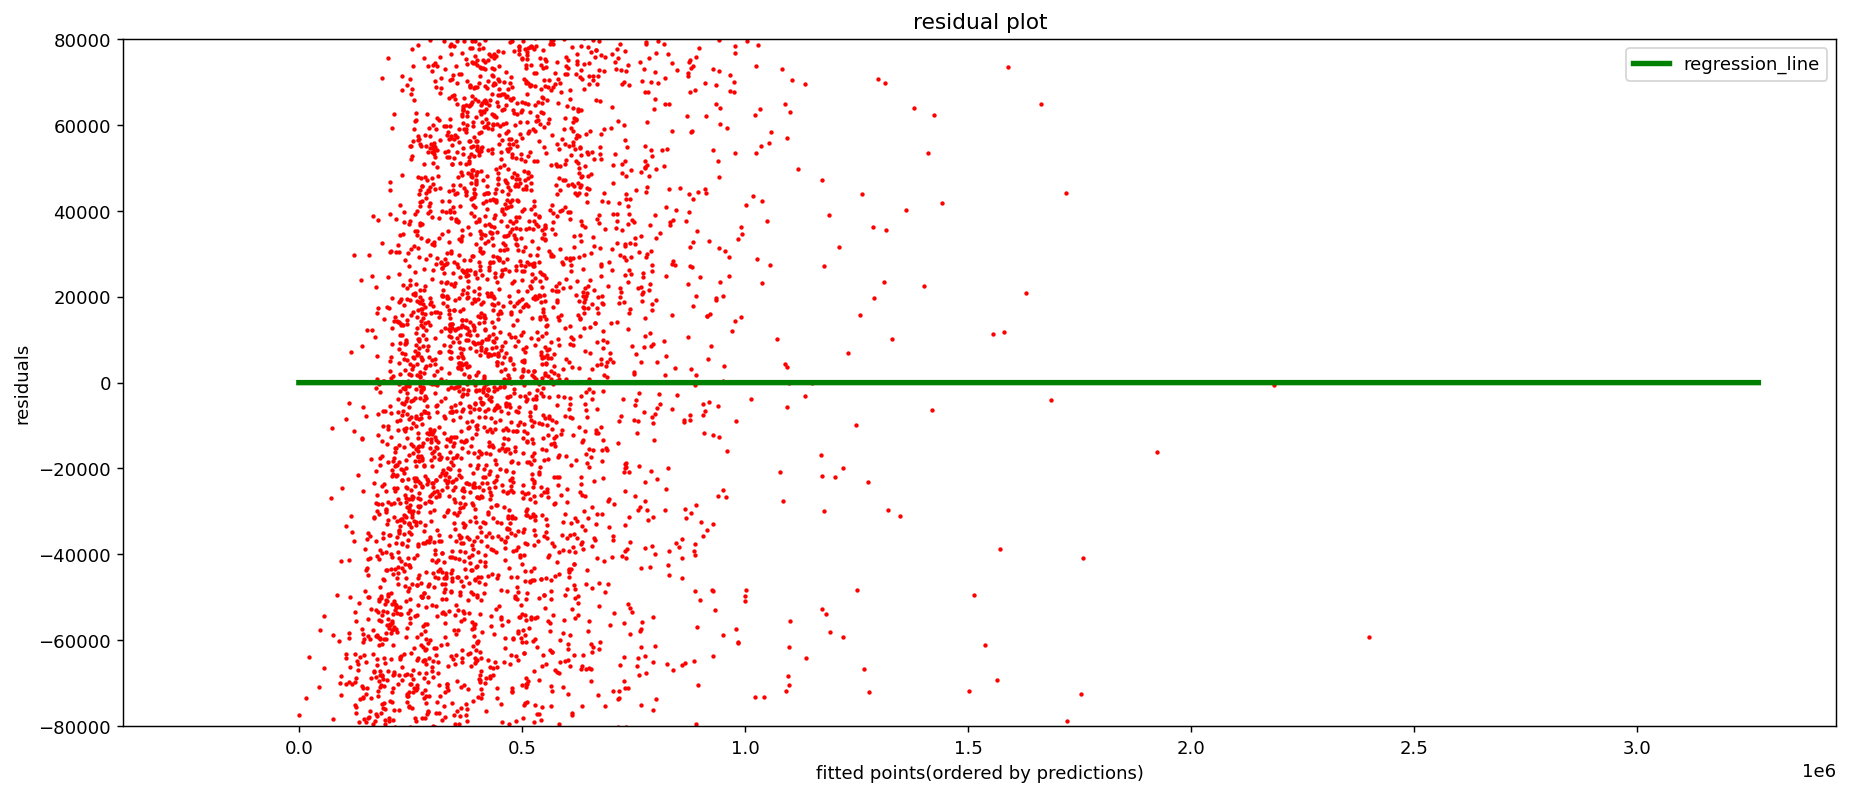

In [1614]:
residuals=predictions-y_test
residual_table=pd.DataFrame({'residuals':residuals,
                              'predictions':predictions})
residual_table=residual_table.sort_values(by='predictions')
z=[i for i in range(int(residual_table['predictions'].max()))]
k=[0 for i in range(int(residual_table['predictions'].max()))]
plt.figure(dpi=130,figsize=(17,7))
plt.scatter(residual_table['predictions'],residual_table['residuals'],color='red',s=2)
plt.plot(z,k,color='green',linewidth=3,label='regression_line')
plt.ylim(-80000,80000)
plt.xlabel('fitted points(ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

# 2. Distribution of errors

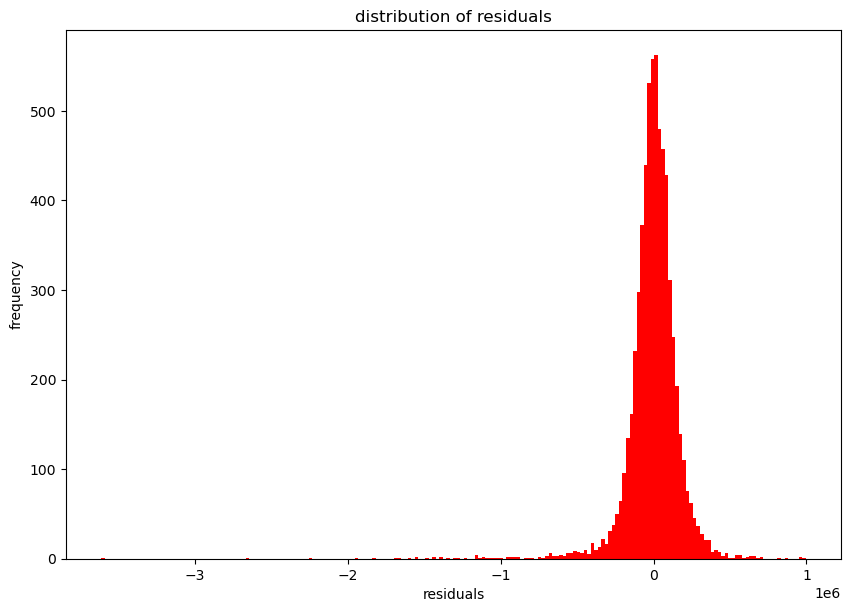

In [1615]:
plt.figure(dpi=100,figsize=(10,7))
plt.hist(residual_table['residuals'],color='red',bins=200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

# Model Coefficients

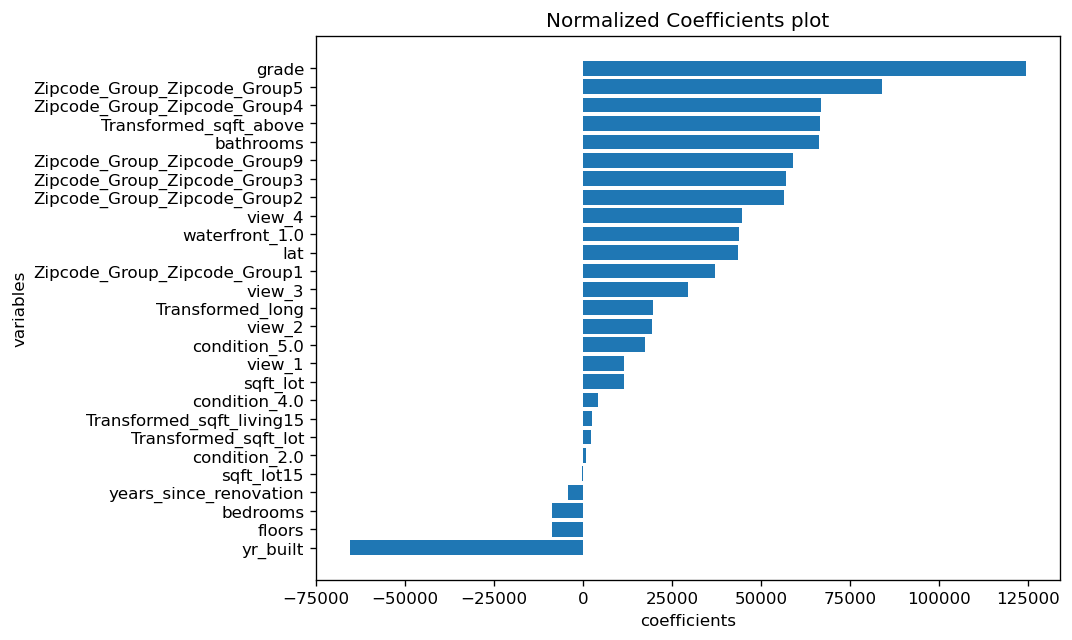

In [1616]:
coefficients_table=pd.DataFrame({'columns':x_train.columns,
                          'coefficients':lr.coef_})
coefficients_table=coefficients_table.sort_values(by='coefficients')
plt.figure(figsize=(8,6),dpi=120)
x=coefficients_table['columns']
y=coefficients_table['coefficients']
plt.barh(x,y)
plt.xlabel('coefficients')
plt.ylabel('variables')
plt.title('Normalized Coefficients plot')
plt.show()